In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [1]:
from cognipy.ontology import Ontology #the ontology processing class
from cognipy.ontology import CQL #SPARQL format tailored for Contolled Natural Language
from cognipy.ontology import encode_string_for_graph_label #complex datatypes encoder for the graph labels in graph visualisation
import textwrap

def graph_attribute_formatter(val):
    if isinstance(val,list) or isinstance(val,set):
        return " | ".join(list(map(lambda i:encode_string_for_graph_label(graph_attribute_formatter(i)),val)))
    elif isinstance(val,dict):
        return " | ".join(list(map(lambda i:i[0]+" : "+encode_string_for_graph_label(graph_attribute_formatter(i[1])),val.items())))
    else:
        return encode_string_for_graph_label(textwrap.fill(str(val),40))

In [2]:
%%writefile RDF_example.encnl

Every classa is a superclass.
Every classb is a superclass.
Every classc is a superclass.
Every classd is a superclass.
Every classe is a superclass.
Every classf is a superclass.
Every classg is a superclass.
Every classh is a superclass.
Every classi is a superclass.


Every classa has-account-id nothing-but (some string value).
Every classb has-account-id nothing-but (some integer value).
Every classc has-account-id nothing-but (some double value).
Every classd has-account-id nothing-but (some float value).
Every classe has-account-id nothing-but (some boolean value).
Every classf has-account-id nothing-but (some duration value).
Every classg has-account-id nothing-but (some decimal value).
Every classh has-account-id nothing-but (some datetime value).
Every classi has-account-id nothing-but (some real value).

Overwriting RDF_example.encnl


In [3]:
onto=Ontology("cnl/file","RDF_example.encnl", 
                    evaluator = lambda e:eval(e,globals(),locals()), 
                    graph_attribute_formatter = graph_attribute_formatter)


In [4]:
onto.sparql_query("select ?x ?y ?z {?x ?y ?z}")

x                      y                z
0       classe     sub-class-of[rdfs]       superclass
1       classe              type[rdf]     "Class"[owl]
2       classd     sub-class-of[rdfs]       superclass
3       classd              type[rdf]     "Class"[owl]
4           ""              type[rdf]  "Ontology"[owl]
..         ...                    ...              ...
60  superclass  equivalent-class[owl]       superclass
61  superclass     sub-class-of[rdfs]       superclass
62      classf     sub-class-of[rdfs]     "Thing"[owl]
63      classf  equivalent-class[owl]           classf
64      classf     sub-class-of[rdfs]           classf

[65 rows x 3 columns]

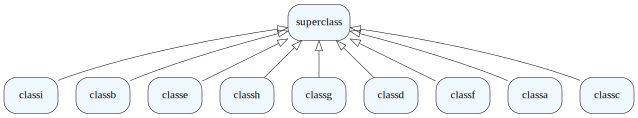

In [5]:
onto.draw_graph()

In [6]:
print(onto.as_cnl())
old_cnl = onto.as_cnl()

Every classa is a superclass.
Every classb is a superclass.
Every classc is a superclass.
Every classd is a superclass.
Every classe is a superclass.
Every classf is a superclass.
Every classg is a superclass.
Every classh is a superclass.
Every classi is a superclass.
Every classa has-account-id nothing-but (some string value).
Every classb has-account-id nothing-but (some integer value).
Every classc has-account-id nothing-but (some double value).
Every classd has-account-id nothing-but (some float value).
Every classe has-account-id nothing-but (some boolean value).
Every classf has-account-id nothing-but (some duration value).
Every classg has-account-id nothing-but (some decimal value).
Every classh has-account-id nothing-but (some datetime value).
Every classi has-account-id nothing-but (some real value).



In [7]:
outputfilename  = 'cnl_RDF_example.encnl'

file = open(outputfilename,"w", encoding="utf8")
file.write(onto.as_cnl())
file.close()

In [8]:
onto_cnl = Ontology("cnl/file","cnl_RDF_example.encnl")

In [9]:
outputfilename  = './cnl_RDF_example.rdf'

file = open(outputfilename,"w", encoding="utf8")
file.write(onto.as_rdf())
file.close()

In [10]:
onto_rdf =  Ontology("rdf/uri","file:///c:/ROOT/cognipy/docsrc/jupyter_notebooks/Test/cnl_RDF_example.rdf")

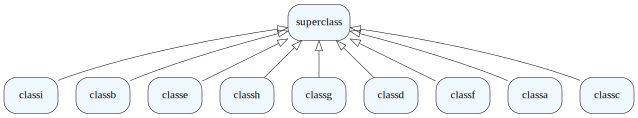

In [11]:
onto_rdf.draw_graph()

In [12]:
print(onto_rdf.as_cnl())
new_cnl = onto_rdf.as_cnl()

Every value-of double is something (some value).
Every value-of float is something (some value).
Every classa is a superclass.
Every classb is a superclass.
Every classc is a superclass.
Every classd is a superclass.
Every classe is a superclass.
Every classf is a superclass.
Every classg is a superclass.
Every classh is a superclass.
Every classi is a superclass.
Every classa has-account-id nothing-but (some string value).
Every classb has-account-id nothing-but (some integer value).
Every classc has-account-id nothing-but (some double value).
Every classd has-account-id nothing-but (some float value).
Every classe has-account-id nothing-but (some boolean value).
Every classf has-account-id nothing-but (some string value).
Every classg has-account-id nothing-but (some integer value).
Every classh has-account-id nothing-but (some datetime value).
Every classi has-account-id nothing-but (greater-or-equal-to 0 or lower-or-equal-to 0).



In [14]:
print(new_cnl)

Every value-of double is something (some value).
Every value-of float is something (some value).
Every classa is a superclass.
Every classb is a superclass.
Every classc is a superclass.
Every classd is a superclass.
Every classe is a superclass.
Every classf is a superclass.
Every classg is a superclass.
Every classh is a superclass.
Every classi is a superclass.
Every classa has-account-id nothing-but (some string value).
Every classb has-account-id nothing-but (some integer value).
Every classc has-account-id nothing-but (some double value).
Every classd has-account-id nothing-but (some float value).
Every classe has-account-id nothing-but (some boolean value).
Every classf has-account-id nothing-but (some string value).
Every classg has-account-id nothing-but (some integer value).
Every classh has-account-id nothing-but (some datetime value).
Every classi has-account-id nothing-but (greater-or-equal-to 0 or lower-or-equal-to 0).



decimal, double, float not handled?

    Every value-of decimal is something (some value).
    Every value-of double is something (some value).
    Every value-of float is something (some value).
    
real treated as the following??

    Every classi has-account-id nothing-but (greater-or-equal-to 0 or lower-or-equal-to 0).